In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import entropy
from time import time
from scipy.optimize import linear_sum_assignment as linear_assignment

In [210]:
# 定義計算SSE的函數
def calculate_sse(X, labels, centers):
    distances = np.linalg.norm(X - centers[labels], axis=1)
    return np.sum(distances**2)

In [211]:
# 定義計算層次聚類和DBSCAN SSE的函數
def calculate_non_centroid_sse(X, labels):
    unique_labels = set(labels)
    # 忽略DBSCAN的噪聲點
    if -1 in unique_labels:  
        unique_labels.remove(-1)
    sse = 0
    for k in unique_labels:
        cluster_k = X[labels == k]
        center_k = cluster_k.mean(axis=0)
        sse += np.sum((cluster_k - center_k) ** 2)
    return sse

In [212]:
# 定義計算熵的函數
def calculate_entropy(labels):
    value, counts = np.unique(labels, return_counts=True)
    return entropy(counts, base=np.e)

In [213]:
# 讀取數據
df = pd.read_csv('banana  (with class label).csv')
df

,x,y,class
0,0.228,0.559,1
1,0.216,0.528,1
2,0.221,0.552,1
3,0.215,0.538,1
4,0.224,0.548,1
...,...,...,...
4806,0.507,0.269,2
4807,0.526,0.237,2
4808,0.513,0.233,2
4809,0.506,0.221,2


In [214]:
# 準備數據
X = df[['x', 'y']].values
y_true = df['class'].values

In [215]:
# 標準化特徵
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 將參數調整為eps=0.1, min_samples=10

In [356]:
# 定義分群算法
cluster_algorithms = {
    'KMeans': KMeans(n_clusters=2, random_state=42,n_init=10),
    'Hierarchical': AgglomerativeClustering(n_clusters=2),
    'DBSCAN': DBSCAN(eps=0.1, min_samples=10)  
}

In [357]:
# 定義函數來找到最佳的標籤映射
def best_label_mapping(true_labels, pred_labels):
    D = max(true_labels.max(), pred_labels.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(pred_labels.size):
        w[pred_labels[i], true_labels[i]] += 1
    ind = linear_assignment(-w)
    return ind


In [358]:
# 分群和性能評估
for name, algorithm in cluster_algorithms.items():
    start_time = time()
    
    # 分群
    cluster_labels = algorithm.fit_predict(X_scaled)
    end_time = time()
    
    # 計算SSE
    sse = None
    if hasattr(algorithm, 'inertia_'):
        sse = algorithm.inertia_
    elif name in ['Hierarchical', 'DBSCAN']:
        sse = calculate_non_centroid_sse(X_scaled, cluster_labels)/100

In [359]:
# 計算Accuracy
for i in range (len(cluster_labels)):
    cluster_labels[cluster_labels == 1] = 2
    
for i in range (len(cluster_labels)):
    cluster_labels[cluster_labels == 0] = 1
    
accuracy = accuracy_score(y_true, cluster_labels)

In [360]:
# 計算Entropy
ent = calculate_entropy(cluster_labels)

In [361]:
# 打印性能指標
print(f'{name} Clustering')
print(f'    Time taken: {end_time - start_time:.4f} seconds')
if sse is not None:
    print(f'SSE: {sse:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Entropy: {ent:.4f}')
    print('--------------------------------------------------')

DBSCAN Clustering
    Time taken: 0.0310 seconds
SSE: 54.3196
Accuracy: 0.9938
Entropy: 0.7254
--------------------------------------------------


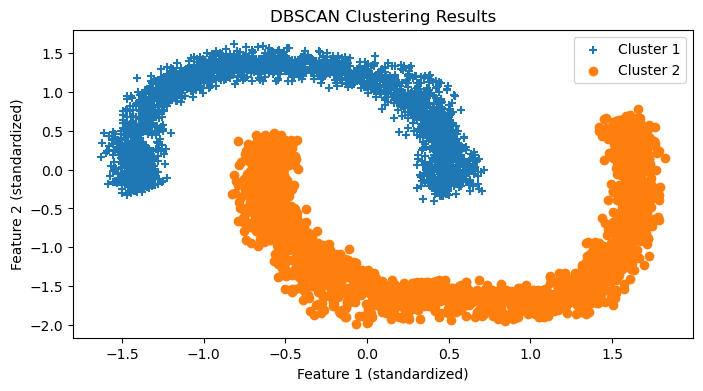

In [362]:
# 繪製分群結果
plt.figure(figsize=(8,4))
markers = ['+', 'o']

for i, marker in zip(range(2), markers):
    plt.scatter(X_scaled[cluster_labels == i+1, 0], X_scaled[cluster_labels == i+1, 1], marker=marker, label=f'Cluster {i+1}')
plt.title(f'{name} Clustering Results')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.legend()
plt.show()

# 將參數調整為eps=0.3, min_samples=10

In [363]:
# 定義分群算法
cluster_algorithms = {
    'KMeans': KMeans(n_clusters=2, random_state=42,n_init=10),
    'Hierarchical': AgglomerativeClustering(n_clusters=2),
    'DBSCAN': DBSCAN(eps=0.3, min_samples=10)  
}

In [364]:
# 定義函數來找到最佳的標籤映射
def best_label_mapping(true_labels, pred_labels):
    D = max(true_labels.max(), pred_labels.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(pred_labels.size):
        w[pred_labels[i], true_labels[i]] += 1
    ind = linear_assignment(-w)
    return ind


In [365]:
# 分群和性能評估
for name, algorithm in cluster_algorithms.items():
    start_time = time()
    
    # 分群
    cluster_labels = algorithm.fit_predict(X_scaled)
    end_time = time()
    
    # 計算SSE
    sse = None
    if hasattr(algorithm, 'inertia_'):
        sse = algorithm.inertia_
    elif name in ['Hierarchical', 'DBSCAN']:
        sse = calculate_non_centroid_sse(X_scaled, cluster_labels)/100

In [366]:
# 計算Accuracy
for i in range (len(cluster_labels)):
    cluster_labels[cluster_labels == 1] = 2
    
for i in range (len(cluster_labels)):
    cluster_labels[cluster_labels == 0] = 1
    
accuracy = accuracy_score(y_true, cluster_labels)

In [367]:
# 計算Entropy
ent = calculate_entropy(cluster_labels)

In [368]:
# 打印性能指標
print(f'{name} Clustering')
print(f'    Time taken: {end_time - start_time:.4f} seconds')
if sse is not None:
    print(f'SSE: {sse:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Entropy: {ent:.4f}')
    print('--------------------------------------------------')

DBSCAN Clustering
    Time taken: 0.0648 seconds
SSE: 54.7488
Accuracy: 1.0000
Entropy: 0.6920
--------------------------------------------------


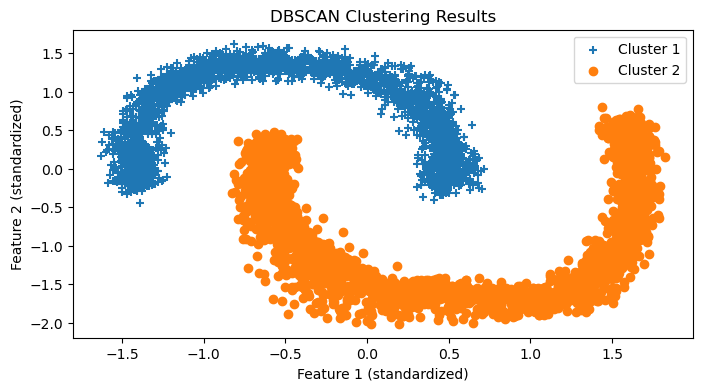

In [369]:
# 繪製分群結果
plt.figure(figsize=(8,4))
markers = ['+', 'o']

for i, marker in zip(range(2), markers):
    plt.scatter(X_scaled[cluster_labels == i+1, 0], X_scaled[cluster_labels == i+1, 1], marker=marker, label=f'Cluster {i+1}')
plt.title(f'{name} Clustering Results')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.legend()
plt.show()

# 將參數調整為eps=0.6, min_samples=15

In [447]:
# 定義分群算法
cluster_algorithms = {
    'KMeans': KMeans(n_clusters=2, random_state=42,n_init=10),
    'Hierarchical': AgglomerativeClustering(n_clusters=2),
    'DBSCAN': DBSCAN(eps=0.6, min_samples=15)  
}

In [448]:
# 定義函數來找到最佳的標籤映射
def best_label_mapping(true_labels, pred_labels):
    D = max(true_labels.max(), pred_labels.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(pred_labels.size):
        w[pred_labels[i], true_labels[i]] += 1
    ind = linear_assignment(-w)
    return ind

In [449]:
# 分群和性能評估
for name, algorithm in cluster_algorithms.items():
    start_time = time()
    
    # 分群
    cluster_labels = algorithm.fit_predict(X_scaled)
    end_time = time()
    
    # 計算SSE
    sse = None
    if hasattr(algorithm, 'inertia_'):
        sse = algorithm.inertia_
    elif name in ['Hierarchical', 'DBSCAN']:
        sse = calculate_non_centroid_sse(X_scaled, cluster_labels)/100

In [450]:
# 計算Accuracy
for i in range (len(cluster_labels)):
    cluster_labels[cluster_labels == 1] = 2
    
for i in range (len(cluster_labels)):
    cluster_labels[cluster_labels == 0] = 1
    
accuracy = accuracy_score(y_true, cluster_labels)

In [451]:
# 計算Entropy
ent = calculate_entropy(cluster_labels)

In [452]:
# 打印性能指標
print(f'{name} Clustering')
print(f'    Time taken: {end_time - start_time:.4f} seconds')
if sse is not None:
    print(f'SSE: {sse:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Entropy: {ent:.4f}')
    print('--------------------------------------------------')

DBSCAN Clustering
    Time taken: 0.0861 seconds
SSE: 96.2200
Accuracy: 0.5238
Entropy: 0.0000
--------------------------------------------------


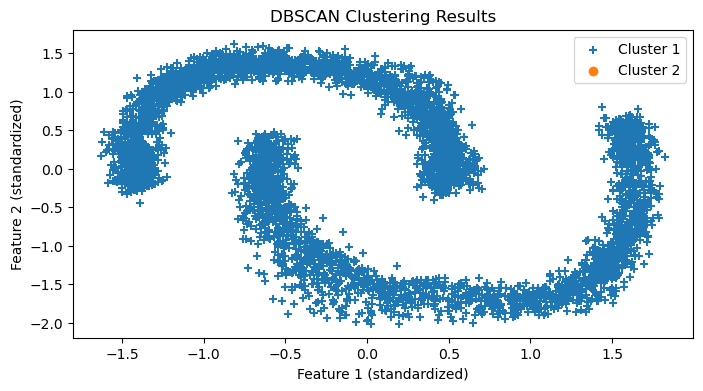

In [453]:
# 繪製分群結果
plt.figure(figsize=(8,4))
markers = ['+', 'o']

for i, marker in zip(range(2), markers):
    plt.scatter(X_scaled[cluster_labels == i+1, 0], X_scaled[cluster_labels == i+1, 1], marker=marker, label=f'Cluster {i+1}')
plt.title(f'{name} Clustering Results')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.legend()
plt.show()